In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
import pandas as pd
from matplotlib.colors import LogNorm

In [55]:
df=pd.read_excel('SSSFDM.xlsx')

In [76]:
ls *.xlsx

omega.xlsx  SSSFDM.xlsx  tmp.xlsx


In [57]:
df=df[df.MF<=200].reset_index(drop=True)

In [58]:
dfo=df[df.files==0]
df1=df[df.files==1]
df2=df[df.files==2]
ind=pd.DataFrame({'MF':[100,120,140,160,180,200],'MF/MS':[1.2,1.19,1.18,1.17,1.16,1.15]})
ind['ss']=ind['MF']/ind['MF/MS']

In [59]:
dfos=dfo[np.logical_and(dfo.Ys1==0.001,dfo.MF-dfo.ss<10) ].sort_values('MF').reset_index(drop=True)
MFcte=100
dfos=dfos.append({'MF':MFcte,'ss':MFcte-(dfos.MF-dfos.ss).values[0]},ignore_index=True).sort_values('MF').reset_index(drop=True)
MFcte=200
dfos=dfos.append({'MF':MFcte,'ss':MFcte-(dfos.MF-dfos.ss).values[-1]},ignore_index=True)
dfos=dfos.sort_values('MF').reset_index(drop=True)

In [27]:
tmp=pd.read_excel('../tmp/tmp.xlsx')

Final result

In [60]:
dfos[dfos.Ys1==1].shape

(0, 180)

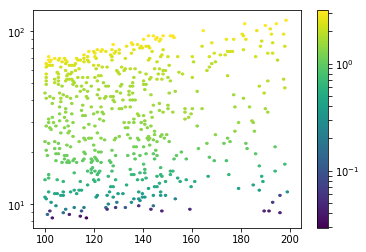

In [62]:
ymax=30
dfos=df#[df.MF-df.ss<10]
plt.hexbin(dfo.MF,dfo.MF-dfo.ss,dfo.Ys1,norm=LogNorm(),yscale='log')#df.Omega_h2,norm=LogNorm())#,yscale='log'
plt.colorbar()

In [135]:
om=pd.read_excel('omega.xlsx')
cta=pd.read_csv('cta.csv')

cta['MF']=cta['MF/MS']*cta.ss

In [137]:
cta

,ss,MF/MS,MF
0,50.452854,2.006213,101.219172
1,50.314924,1.503527,75.649852
2,50.314924,1.249502,62.868602
3,52.711879,1.199455,63.225537
4,61.613669,1.190653,73.360522
5,80.133408,1.173005,93.996859
6,93.666046,1.164203,109.046273
7,114.699742,1.150077,131.913512
8,149.995016,1.134222,170.127645
9,195.080280,1.120151,218.519386


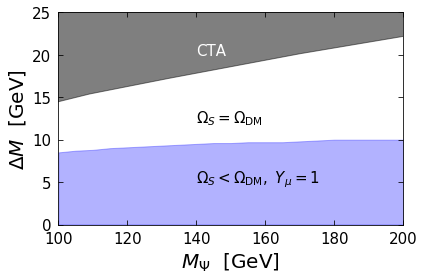

In [136]:
ymax=25
#dfos=dfo[np.logical_and(dfo.Ys1==0.001,dfo.MF-dfo.ss<10) ]
#plt.hexbin(dfo.MF,dfo.MF-dfo.ss,dfo.Ys1,norm=LogNorm())#df.Omega_h2,norm=LogNorm())#,yscale='log'
#plt.plot(dfo.MF,dfo.MF-dfo.ss,'y.')
##plt.plot(df1.MF,df1.MF-df1.ss,'c.')
#plt.plot(df2.MF,df2.MF-df2.ss,'b.')
#plt.plot(dfos.MF,dfos.MF-dfos.ss)
#plt.plot(ind.MF,ind.MF-ind.ss)
plt.fill_between(cta.MF,cta.MF-cta.ss,ymax,alpha=0.5,interpolate=True,color='black')
#plt.fill_between(dfos.MF,dfos.MF-dfos.ss,ymax,alpha=0.3,interpolate=True,color='yellow')
#plt.fill_between(dfos.MF,dfos.MF-dfos.ss,ymax,alpha=0.3,interpolate=True,color='yellow')
#plt.fill_between(dfos.MF,dfos.MF-dfos.ss,0,alpha=0.3,interpolate=True,color='blue')
#plt.plot(om.MF,om.MF-om.ss)
plt.fill_between(om.MF,om.MF-om.ss,alpha=0.3,interpolate=True,color='blue')
plt.ylim(0,ymax)
plt.xlim(100,200)
plt.text(140,20,'CTA',size=15,color='white')
plt.text(140,12,r'$\Omega_S=\Omega_{\rm DM}$',size=15)
plt.text(140,5,r'$\Omega_S<\Omega_{\rm DM},\ Y_\mu=1$',size=15)
plt.xlabel(r'$M_\Psi$  [GeV]',size=20 )
plt.ylabel(r'$\Delta M$  [GeV]',size=20 )
plt.tick_params(direction='in',length=5,top=True,right=True,labelsize=15,pad=7)
plt.tight_layout()
plt.savefig('ps.pdf')
#plt.colorbar()

In [92]:
mpl.axes.Axes.tick_params?

In [57]:
ind['DeltaM']=ind.MF-ind.ss
ind

,MF,MF/MS,ss,DeltaM
0,100,1.20,83.333333,16.666667
1,120,1.19,100.840336,19.159664
2,140,1.18,118.644068,21.355932
3,160,1.17,136.752137,23.247863
4,180,1.16,155.172414,24.827586
5,200,1.15,173.913043,26.086957


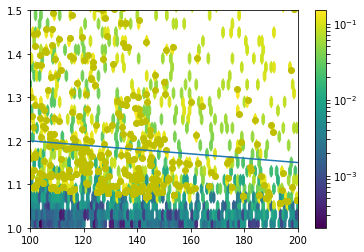

In [51]:
plt.hexbin(df.MF,df.MF/df.ss,df.Omega_h2,norm=LogNorm())
plt.plot(dfo.MF,dfo.MF/dfo.ss,'yo')
plt.plot(ind.MF,ind.MF/ind.ss)
plt.ylim(1,1.5)
plt.colorbar()

In [27]:
dfo.Omega_h2.max()

0.14899999999999999

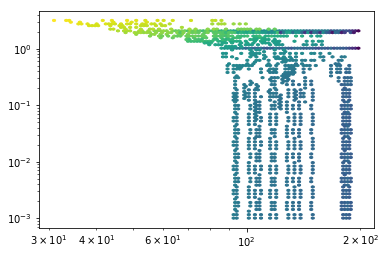

In [18]:
plt.hexbin(df.ss,df.Ys1,df.MF/df.ss-1,xscale='log',yscale='log',norm=LogNorm())